In [ ]:
# Initial Codel

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('/home/suhail/Downloads/programming_demonstration/hourly_data_2002-2021.xlsx',parse_dates=True)

#Convert the date  into the time-date stamp

df['date'] = pd.to_datetime(df.date)

# Replacing the M values as NaN and convert all the columns as float64

cols = ["temp_f","rh_perc","precip_in","dewpoint_f","windspeed_mph","winddir_deg"]
df[cols] = df[cols].replace({'M':np.nan})
df.apply(pd.to_numeric)


                      date  temp_f  rh_perc  precip_in  dewpoint_f  \
0      2002-01-01 00:54:00    12.0      NaN        NaN         5.0   
1      2002-01-01 01:54:00    12.0      NaN        NaN         5.0   
2      2002-01-01 02:54:00    10.0      NaN        NaN         3.0   
3      2002-01-01 03:54:00    10.0      NaN        NaN         3.0   
4      2002-01-01 04:54:00     9.0      NaN        NaN         1.0   
...                    ...     ...      ...        ...         ...   
167235 2021-01-31 19:54:00    33.0      NaN       0.00        30.0   
167236 2021-01-31 20:54:00    32.0      NaN       0.01        29.0   
167237 2021-01-31 21:54:00    32.0      NaN       0.00        29.0   
167238 2021-01-31 22:54:00    31.0      NaN       0.00        28.0   
167239 2021-01-31 23:54:00    31.0      NaN       0.00        27.0   

        windspeed_mph  winddir_deg  
0                 5.0        260.0  
1                 5.0        250.0  
2                 5.0        260.0  
3          

/tmp/ipykernel_315827/11835412.py:17: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df2.loc['Median']=df.median()


,temp_f,rh_perc,precip_in,dewpoint_f,windspeed_mph,winddir_deg
count,24.0,24.0,24.0,24.0,24.0,24.0
mean,27.460782,77.270655,0.003185,20.485183,8.694226,197.350249
std,2.635695,5.999551,0.001079,1.000844,1.228989,10.645188
min,23.76873,64.292683,0.001558,18.673736,7.350413,182.94702
25%,25.294643,72.804018,0.002496,19.721138,7.676415,190.243427
50%,27.216404,79.352853,0.002843,20.67089,8.268535,194.171212
75%,29.447608,82.354984,0.003551,21.443588,9.720045,205.43677
max,31.729642,84.40625,0.006149,21.696429,11.071313,216.849088
dtype,float64,float64,float64,float64,float64,float64
missing vals,1538,158411,29437,1713,2039,6212


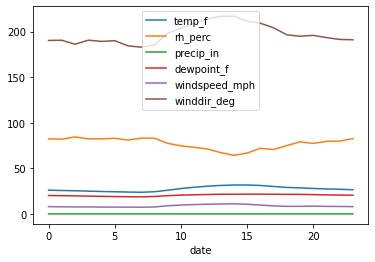

In [30]:
# Choose specific month for calculation and mean and plot it
# Choose dt.month ==2-12 for different months
# dt1 = January

df1 = df[pd.to_datetime(df['date']).dt.month == 1]
print(df1)
df_jan = df1.groupby(df1['date'].dt.hour).mean()
print(df_jan)
df_jan.plot()

# Monthwise Summary statistics with all the informations


df2 = df_jan.describe(include = 'all')
df2.loc['dtype'] = df.dtypes
df2.loc['missing vals'] = df.isnull().sum()
df2.loc['Median']=df.median()
df2

                      date  temp_f  rh_perc  precip_in  dewpoint_f  \
8016   2002-12-01 00:54:00    19.0      NaN        NaN         9.0   
8017   2002-12-01 01:54:00    19.0      NaN        NaN         9.0   
8018   2002-12-01 02:54:00    18.0      NaN        NaN         9.0   
8019   2002-12-01 03:54:00    16.0      NaN        NaN         7.0   
8020   2002-12-01 04:54:00    16.0      NaN        NaN         5.0   
...                    ...     ...      ...        ...         ...   
175227 2021-12-31 19:54:00    50.0      NaN        0.0        47.0   
175228 2021-12-31 20:54:00    50.0      NaN        0.0        48.0   
175229 2021-12-31 21:54:00    50.0      NaN        0.0        49.0   
175230 2021-12-31 22:54:00    50.0      NaN        0.0        50.0   
175231 2021-12-31 23:54:00    49.0      NaN        0.0        49.0   

        windspeed_mph  winddir_deg  
8016              9.0        300.0  
8017              9.0        290.0  
8018              9.0        290.0  
8019       

/tmp/ipykernel_315827/1110345169.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_summ_dec = df12.describe(include = 'all')
/tmp/ipykernel_315827/1110345169.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_summ_dec.loc['Median']=df12.median()


,date,temp_f,rh_perc,precip_in,dewpoint_f,windspeed_mph,winddir_deg
count,14869,14776.0,682.0,12281.0,14770.0,14707.0,14594.0
unique,14869,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-12-01 02:54:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,2002-12-01 00:54:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-31 23:54:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.564903,74.714076,0.003821,26.144617,8.025498,185.470741
std,NaN,11.521744,14.450038,0.020613,12.137149,5.187727,105.792172
min,NaN,-10.0,42.0,0.0,-13.0,0.0,0.0
25%,NaN,26.0,63.25,0.0,19.0,5.0,100.0


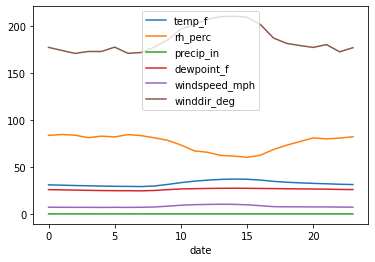

In [29]:
df12 = df[pd.to_datetime(df['date']).dt.month == 12]
print(df12)
df_dec = df12.groupby(df12['date'].dt.hour).mean()
print(df_dec)
df_dec.plot()

# Monthwise Summary statistics with all the informations

df_summ_dec = df12.describe(include = 'all')
df_summ_dec.loc['dtype'] = df12.dtypes
df_summ_dec.loc['missing vals'] = df12.isnull().sum()
df_summ_dec.loc['Median']=df12.median()
df_summ_dec